# Мои попытки решить задачу классфикации с помошью нейронной сети

In [29]:
import numpy as np
from data_loader import load_data

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
from common import *

# Загрузка и подготовка данных для классификации

Загрузка

In [30]:
X, Y = load_data("2dim_data_for_nn.csv")

Подготовка тензоров

In [31]:
X_tens = torch.tensor(X.astype('float32'))
Y_tens = torch.tensor(Y.reshape(len(Y),1).astype('float32'))

# Запись нейронной сети

In [32]:
class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

        self.fc1.weight = \
        torch.nn.parameter.Parameter(torch.tensor([[-1.8193, 4.6818], [-5.7335, 2.2301]]))
        self.fc2.weight = \
        torch.nn.parameter.Parameter(torch.tensor([[-3.3749, -5.6865]]))
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

simple_net = SimpleNet()

# Оптимизатор

In [33]:
optimizer = optim.Adam(simple_net.parameters(), lr=0.001)

# Функция потерь

In [34]:
loss_fn = torch.nn.MSELoss()

# Пробуем немного поучить нашу сетку

Первая запись обучающего алгоритма

In [35]:
print(simple_net.fc1.weight)
print(simple_net.fc2.weight)

for t in range(10000):
    predict = simple_net(torch.tensor(X.astype('float32')))
    loss = loss_fn(predict, Y_tens)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(simple_net.fc1.weight)
print(simple_net.fc2.weight)

Parameter containing:
tensor([[-1.8193,  4.6818],
        [-5.7335,  2.2301]], requires_grad=True)
Parameter containing:
tensor([[-3.3749, -5.6865]], requires_grad=True)
Parameter containing:
tensor([[ 1.1509,  6.5081],
        [-8.5394,  5.5335]], requires_grad=True)
Parameter containing:
tensor([[ -9.9062, -14.3780]], requires_grad=True)


Более сложная - стащил из книжки

def train(model, optimizer, loss_fn, train_loader, epochs=20, device="cpu"):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            print('hello')
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)

data_set = torch.utils.data.TensorDataset(X_tens, Y_tens)
train_data_loader = torch.utils.data.DataLoader(data_set, batch_size=50)


print(simple_net.fc1.weight)
print(simple_net.fc2.weight)
train(simple_net, optimizer, loss_fn, train_data_loader)
print(simple_net.fc1.weight)
print(simple_net.fc2.weight)

# Проверка качества

In [36]:
simple_net.fc1.weight

Parameter containing:
tensor([[ 1.1509,  6.5081],
        [-8.5394,  5.5335]], requires_grad=True)

In [41]:
probs_hat = simple_net(torch.tensor(X.astype('float32'))).detach().numpy()
p_bar = get_p_bar(Y, probs_hat)
probs_hat

array([[4.79143228e-23],
       [9.74669814e-01],
       [9.74669814e-01],
       [9.74669814e-01],
       [6.83451375e-08],
       [0.00000000e+00],
       [2.22824604e-14],
       [3.96605145e-12],
       [2.48721334e-12],
       [9.74669814e-01],
       [2.68630851e-02],
       [5.51167659e-07],
       [9.74669814e-01],
       [9.63017563e-20],
       [9.67278659e-01],
       [9.74669814e-01],
       [9.74669814e-01],
       [1.91455962e-09],
       [4.41354041e-36],
       [1.79915368e-34],
       [1.26489608e-21],
       [9.74669814e-01],
       [8.08420920e-22],
       [9.74669814e-01],
       [9.74669814e-01],
       [1.38171898e-18],
       [1.88151204e-16],
       [9.74669814e-01],
       [2.29762344e-29],
       [2.60690560e-38],
       [2.88333369e-25],
       [0.00000000e+00],
       [8.25984836e-01],
       [9.74669814e-01],
       [2.77950408e-18],
       [3.05123250e-18],
       [1.86328374e-24],
       [8.63279581e-07],
       [9.74669814e-01],
       [0.00000000e+00],


In [38]:
is_correct_pred = ((probs_hat > p_bar).ravel() == Y)

sum(is_correct_pred)


597

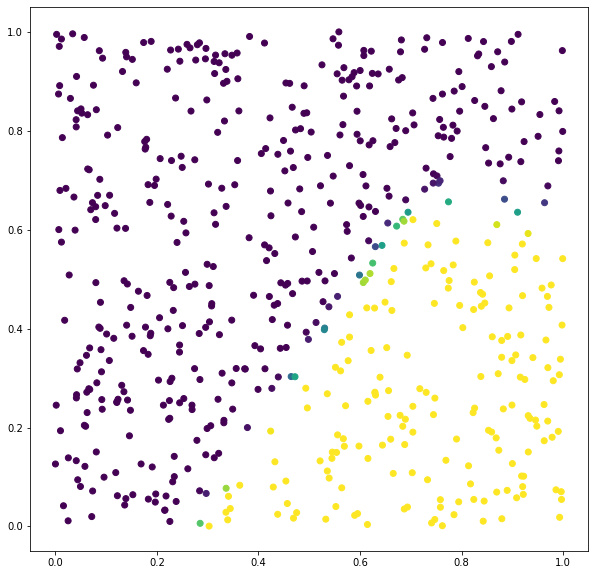

In [39]:

plt.figure(figsize = [10,10])
plt.scatter(X[:,0], X[:,1],c = probs_hat)

In [40]:
prediction[X[:, 0] > 0.5]

NameError: name 'prediction' is not defined